In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
selected_data = pd.read_csv("../data/02_Interim/01_SelectedFeutures.csv")

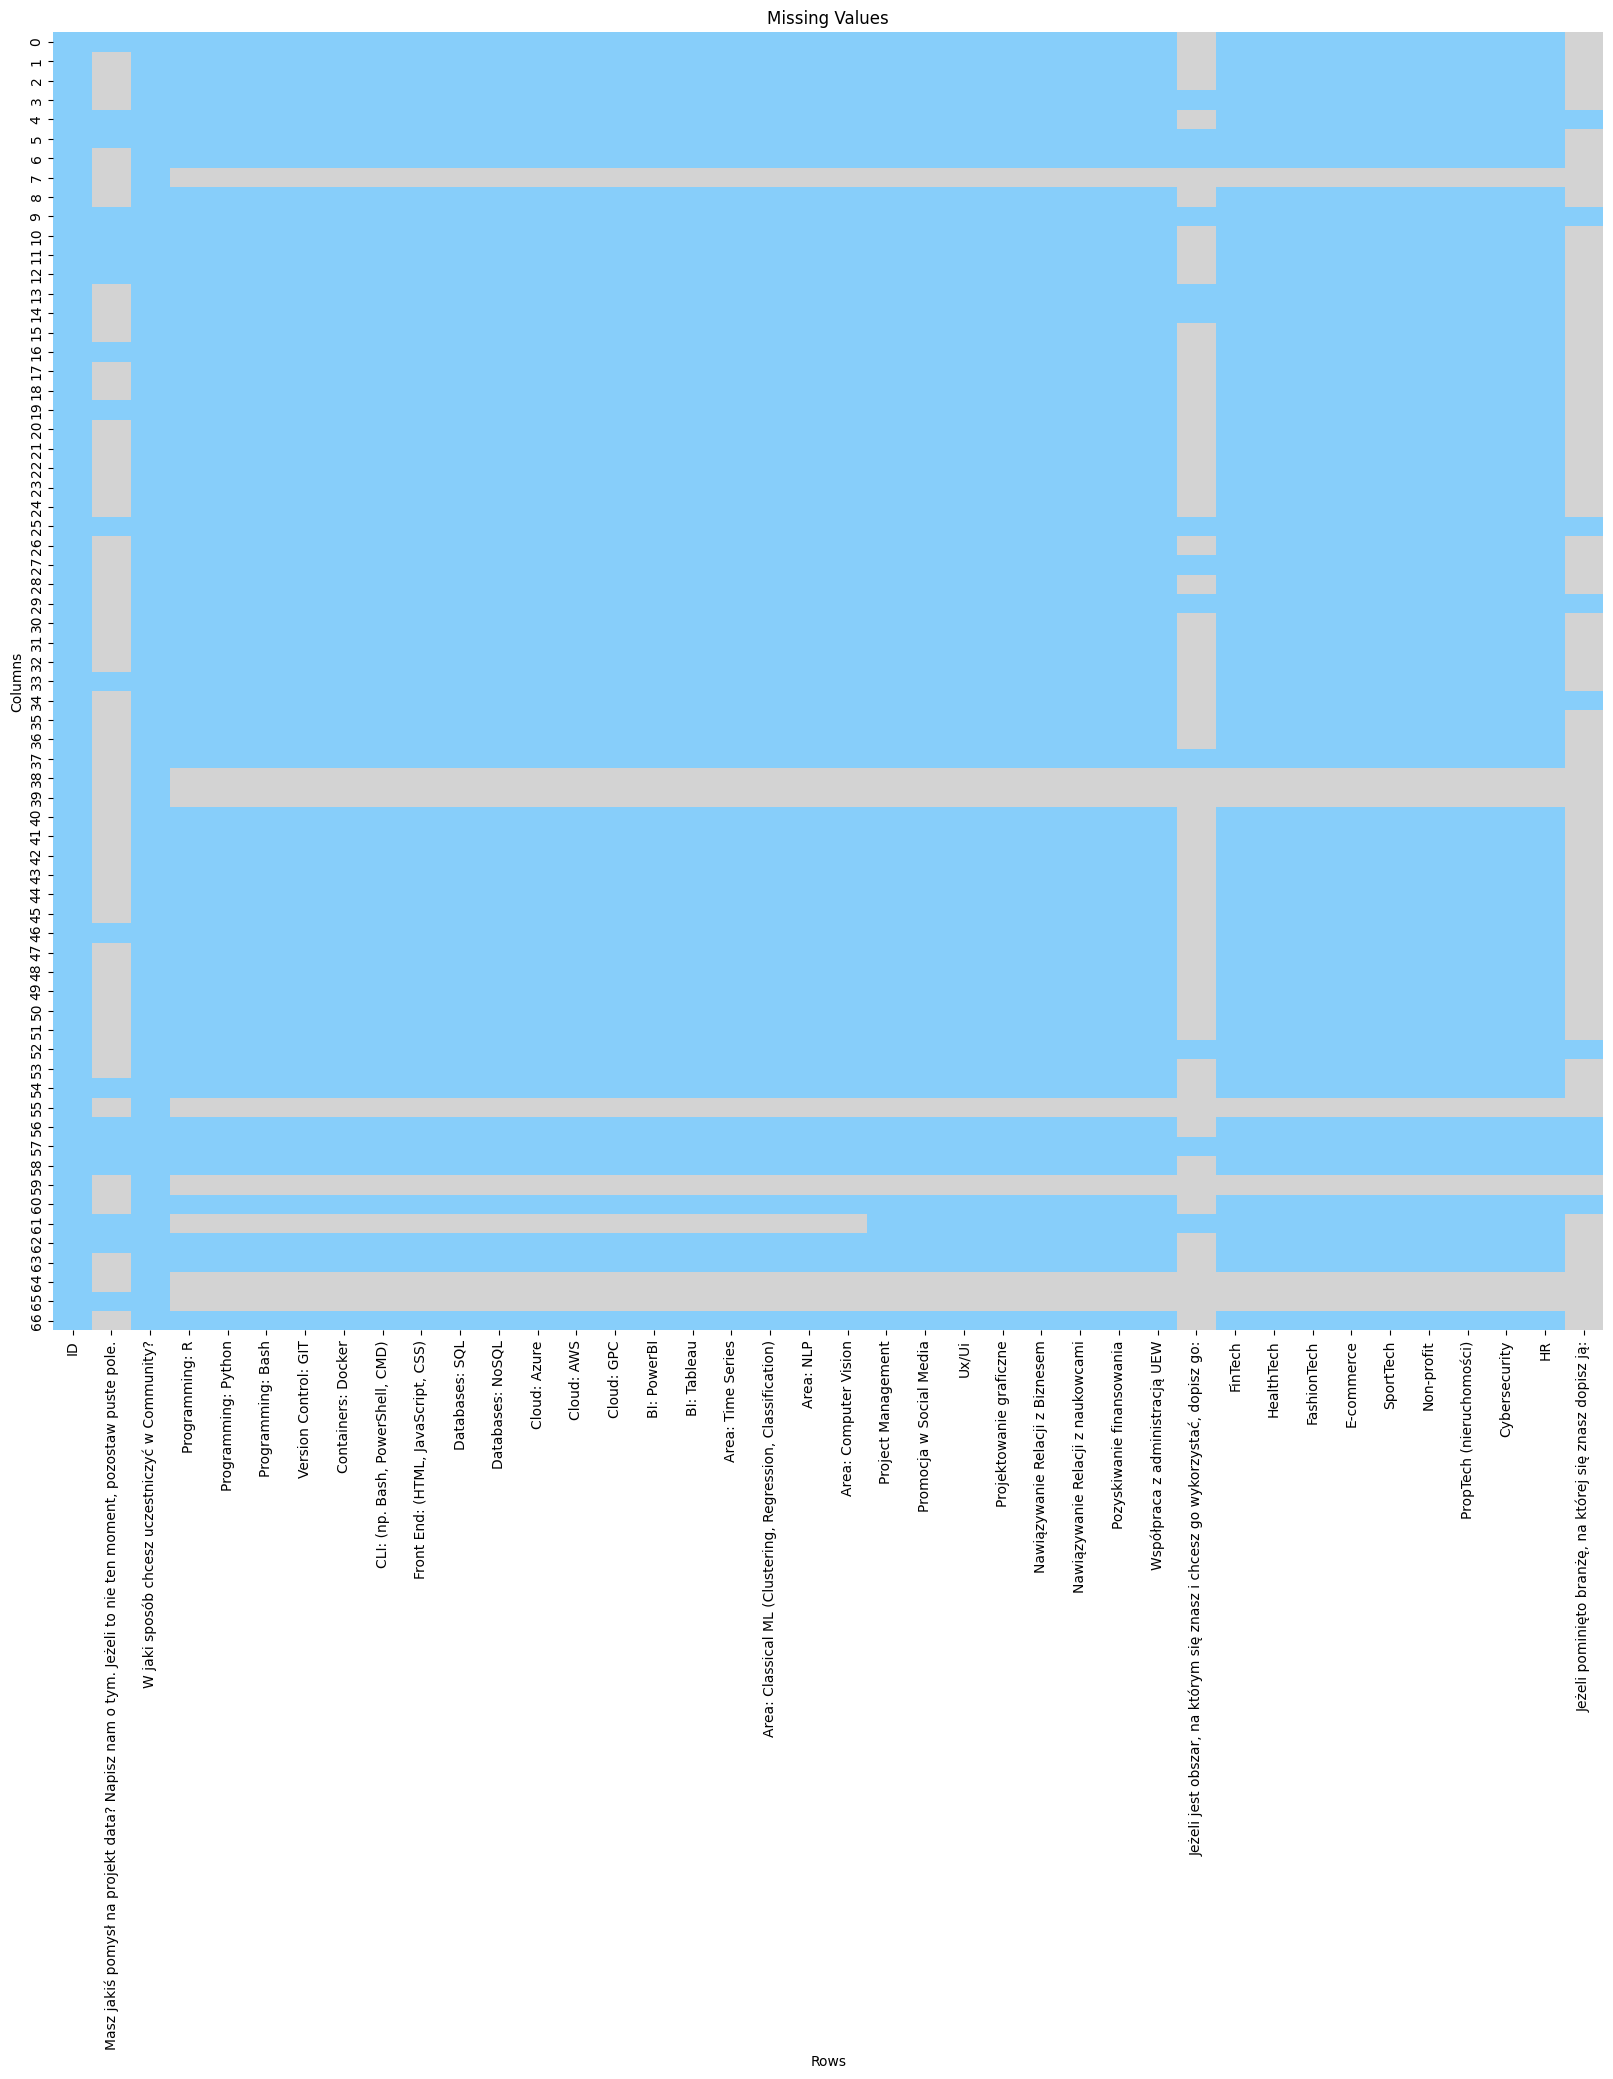

In [3]:
palette = sns.color_palette(['#87CEFA', '#D3D3D3'])
plt.figure(figsize=(20, 20))
ax = plt.axes(aspect=0.5)
heatmap = sns.heatmap(selected_data.isna(), cmap=palette,cbar=False, ax=ax)
heatmap.set_title('Missing Values', fontsize=12)
plt.xlabel('Rows', fontsize=10) 
plt.ylabel('Columns', fontsize=10)
plt.savefig('../figures/02_MissingValuesHeatmap.png', dpi=300,bbox_inches='tight')
plt.show()

In [4]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 40 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   ID                                                                                                   67 non-null     int64  
 1   Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  19 non-null     object 
 2   W jaki sposób chcesz uczestniczyć w Community?                                                       67 non-null     object 
 3   Programming: R                                                                                       59 non-null     float64
 4   Programming: Python                                                                                  59 non-null

In [5]:
selected_data.rename(columns={"W jaki sposób chcesz uczestniczyć w Community?": "Participation"},inplace=True)

In [6]:
selected_data['Participation'].unique()

array(['Chcę uczestniczyć w projekcie data i organizować "życie" Community',
       'Chcę uczestniczyć w projekcie data',
       'Póki co chcę czerpać, obserwować, "konsumować content"',
       'Chcę organizować "życie" Community'], dtype=object)

In [7]:
selected_data['Participation'].replace({'Chcę uczestniczyć w projekcie data i organizować "życie" Community': 'Project+organization', 
                                       'Chcę uczestniczyć w projekcie data': 'Project'},inplace=True)

/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_27692/3134905921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data['Participation'].replace({'Chcę uczestniczyć w projekcie data i organizować "życie" Community': 'Project+organization',


In [8]:
selected_data = selected_data[(selected_data['Participation'] != 'Póki co chcę czerpać, obserwować, "konsumować content"') & 
                              (selected_data['Participation'] != 'Chcę organizować "życie" Community')]

In [9]:
selected_data.drop(['Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.',
                    'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:',
                    'Jeżeli pominięto branżę, na której się znasz dopisz ją:'],axis=1,inplace=True)

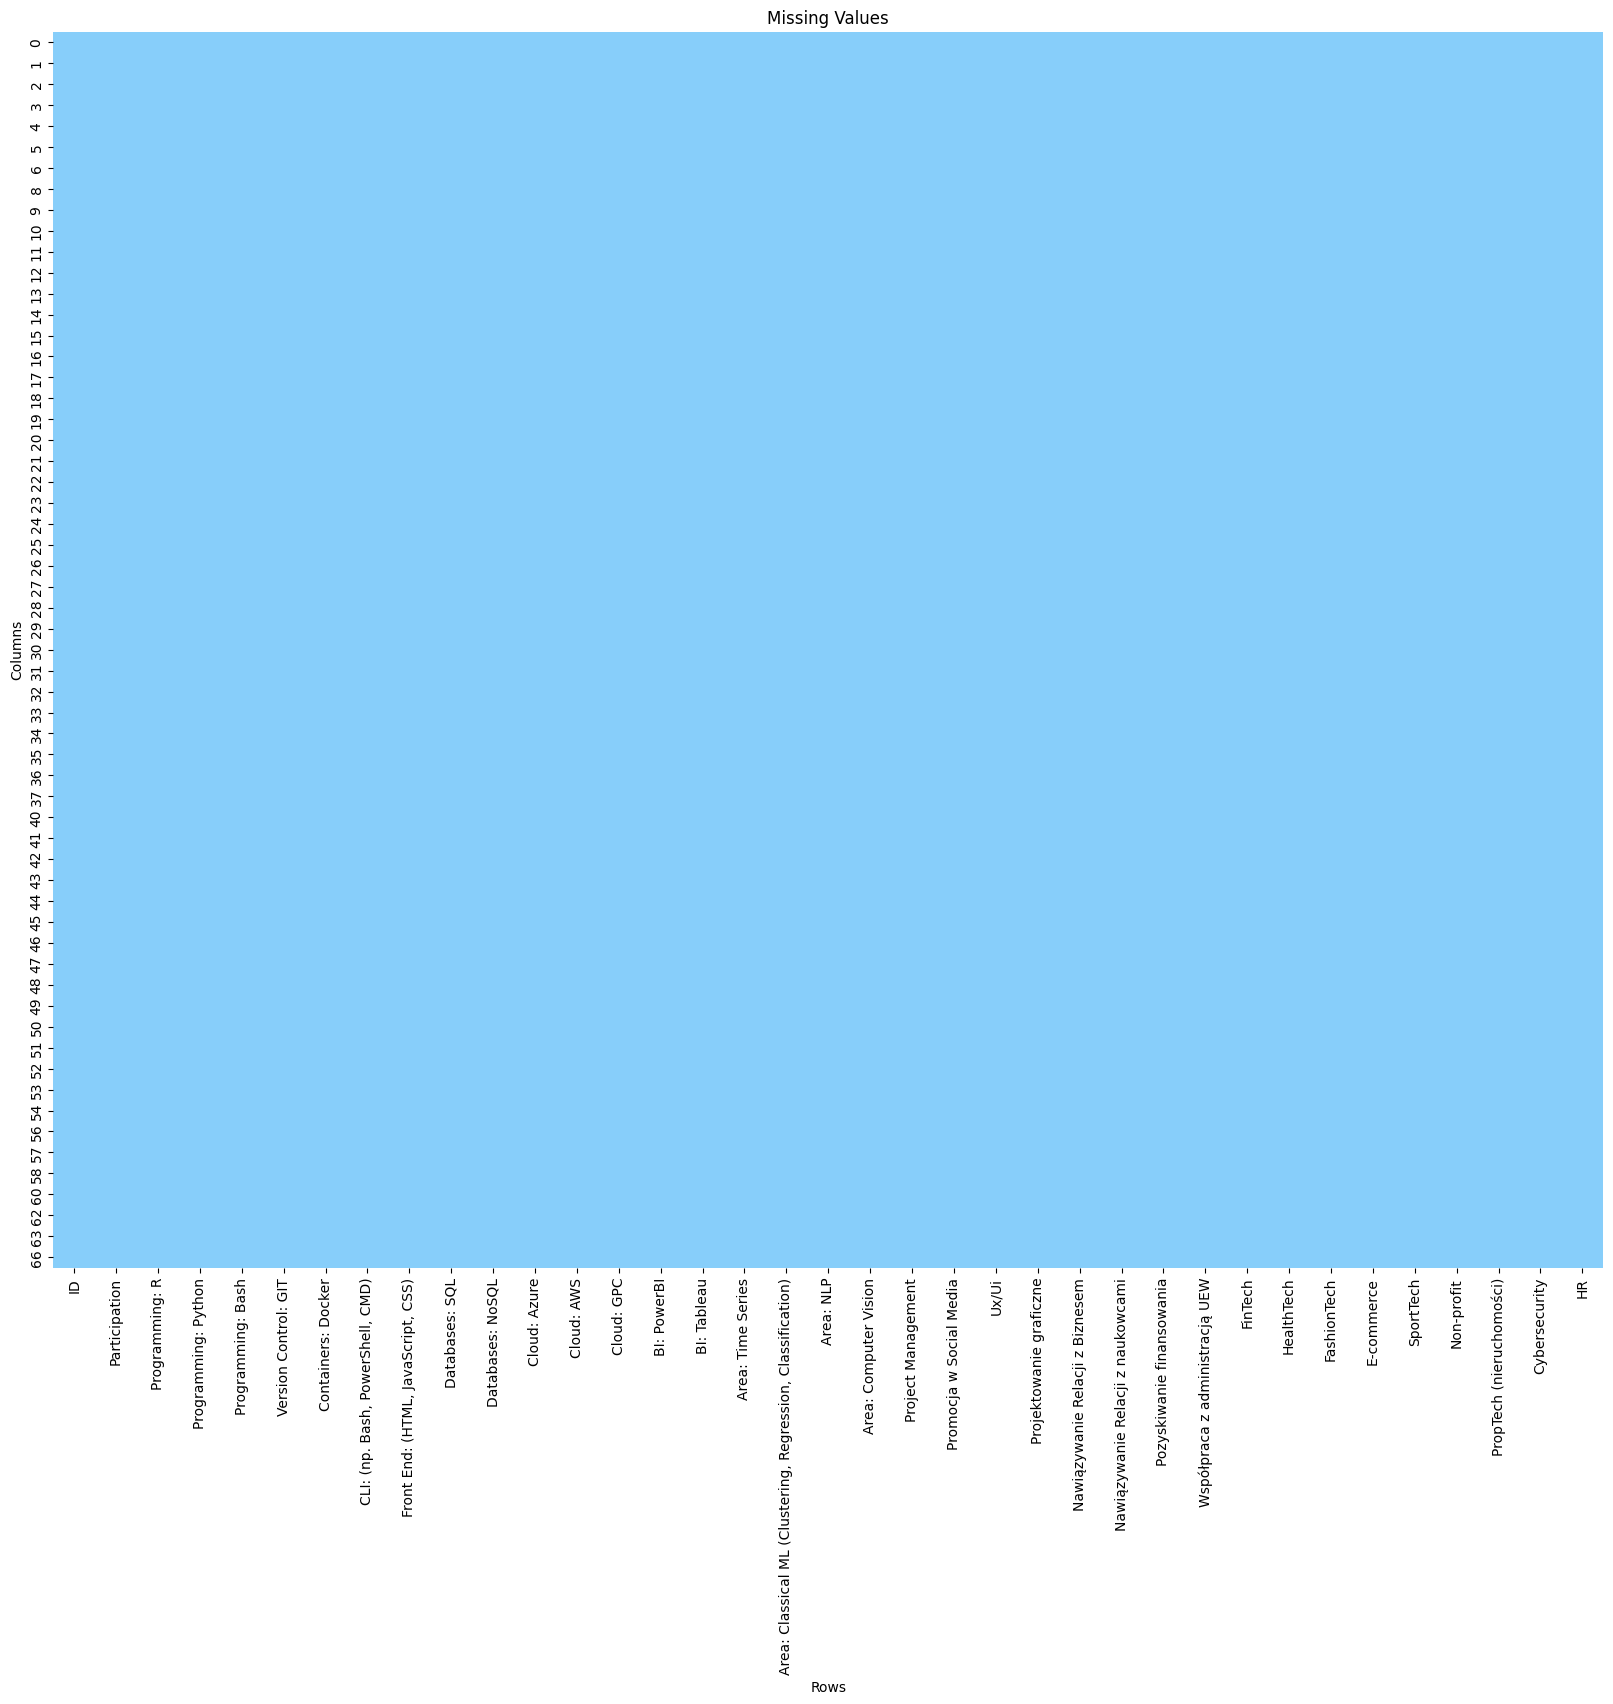

In [10]:
palette = sns.color_palette(['#87CEFA', '#D3D3D3'])
plt.figure(figsize=(20, 20))
ax = plt.axes(aspect=0.5)
heatmap = sns.heatmap(selected_data.isna(), cmap=palette,cbar=False, ax=ax)
heatmap.set_title('Missing Values', fontsize=12)
plt.xlabel('Rows', fontsize=10) 
plt.ylabel('Columns', fontsize=10)
plt.savefig('../figures/02_NoMissingValuesHeatmap.png', dpi=300,bbox_inches='tight')
plt.show()

Zamiana wartości z 0 na 1


In [11]:
selected_data.replace({0.0: 1.0, 1.0: 0.0}, inplace=True)

In [12]:
selected_data['Participation'] = selected_data['Participation'].map({'Project+organization': 0, 'Project': 1})

In [13]:
selected_data.to_csv("../data/03_Processed/02_ProcessedData.csv", index=False)

In [14]:
selected_data.drop(['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech',
       'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR'],axis=1,inplace=True)

In [15]:
selected_data.to_csv("../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv", index=False)